## Maulia Harjono

# DATA



> Download data dari dataset stanford menggunakan perintah wget dan disimpan dalam local storage google colab. Dataset yang di-download adalah cars_train.tgz, cars_test.tgz, dan cars_devkit.tgz. Dataset berupa gambar mobil yang memiliki label sebanyak 196 kelas. 


In [0]:
!wget http://imagenet.stanford.edu/internal/car196/cars_train.tgz

--2019-08-19 23:18:59--  http://imagenet.stanford.edu/internal/car196/cars_train.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  1.82MB/s    in 5m 23s  

2019-08-19 23:24:22 (2.89 MB/s) - ‘cars_train.tgz’ saved [979269282/979269282]



In [0]:
!wget http://imagenet.stanford.edu/internal/car196/cars_test.tgz

--2019-08-19 23:26:30--  http://imagenet.stanford.edu/internal/car196/cars_test.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977350468 (932M) [application/x-gzip]
Saving to: ‘cars_test.tgz’

cars_test.tgz       100%[===================>] 932.07M  15.9MB/s    in 4m 31s  

2019-08-19 23:31:01 (3.44 MB/s) - ‘cars_test.tgz’ saved [977350468/977350468]



In [0]:
!wget http://ai.stanford.edu/~jkrause/cars/car_devkit.tgz

--2019-08-19 23:33:23--  http://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330960 (323K) [application/x-gzip]
Saving to: ‘car_devkit.tgz’

car_devkit.tgz      100%[===================>] 323.20K   523KB/s    in 0.6s    

2019-08-19 23:33:24 (523 KB/s) - ‘car_devkit.tgz’ saved [330960/330960]



In [0]:
!pip3 install console-progressbar

  Created wheel for console-progressbar: filename=console_progressbar-1.1.2-cp36-none-any.whl size=4141 sha256=841efdda68d4a34a66716a7af5954b1e4288315a32c1e9701f487af97f66050b
  Stored in directory: /root/.cache/pip/wheels/35/48/4c/dfcbbd70b7a1690c7113e01fa2201a809203078d96de82b900
Successfully built console-progressbar


# Car Classification



> Klasifikasi dilakukan menggunakan dataset stanford cars. Dataset di-extract dan dipindahkan ke dalam folder data yang terbagi menjadi data train, data test, dan data valid. Ekstraksi, penyimpanan, dan pembacaan dilakukan menggunakan fungsi di bawah. 



In [0]:
# This preprocessing portion of the code is provided by foamliu on his github repo
# https://github.com/foamliu/Car-Recognition/blob/master/pre-process.py

import tarfile
import scipy.io
import numpy as np
import os
import cv2 as cv
import shutil
import random
from console_progressbar import ProgressBar


def ensure_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)


def save_train_data(fnames, labels, bboxes):
    src_folder ='//content//cars_train//'
    num_samples = len(fnames)

    train_split = 0.8
    num_train = int(round(num_samples * train_split))
    train_indexes = random.sample(range(num_samples), num_train)

    pb = ProgressBar(total=100, prefix='Save train data', suffix='', decimals=3, length=50, fill='=')

    for i in range(num_samples):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]

        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print("{} -> {}".format(fname, label))
        pb.print_progress_bar((i + 1) * 100 / num_samples)

        if i in train_indexes:
            dst_folder = '//content//data//train//'
        else:
            dst_folder = '//content//data//valid//'

        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)

        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)


def save_test_data(fnames, bboxes):
    src_folder = '//content//cars_test//'
    dst_folder = '//content//data//test//'
    num_samples = len(fnames)

    pb = ProgressBar(total=100, prefix='Save test data', suffix='', decimals=3, length=50, fill='=')

    for i in range(num_samples):
        fname = fnames[i]
        (x1, y1, x2, y2) = bboxes[i]
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print(fname)
        pb.print_progress_bar((i + 1) * 100 / num_samples)

        dst_path = os.path.join(dst_folder, fname)
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)


def process_train_data():
    print("Processing train data...")
    cars_annos = scipy.io.loadmat('//content//devkit//cars_train_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    class_ids = []
    bboxes = []
    labels = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        labels.append('%04d' % (class_id,))
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)

    labels_count = np.unique(class_ids).shape[0]
    print(np.unique(class_ids))
    print('The number of different cars is %d' % labels_count)

    save_train_data(fnames, labels, bboxes)


def process_test_data():
    print("Processing test data...")
    cars_annos = scipy.io.loadmat('//content//devkit//cars_test_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    bboxes = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        fname = annotation[0][4][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        fnames.append(fname)

    save_test_data(fnames, bboxes)


if __name__ == '__main__':
    # parameters
    img_width, img_height = 224, 224

    print('Extracting cars_train.tgz...')
    if not os.path.exists('cars_train'):
        with tarfile.open('//content//cars_train.tgz', "r:gz") as tar:
            tar.extractall()
    print('Extracting cars_test.tgz...')
    if not os.path.exists('cars_test'):
        with tarfile.open('//content//cars_test.tgz', "r:gz") as tar:
            tar.extractall()
    print('Extracting car_devkit.tgz...')
    if not os.path.exists('devkit'):
        with tarfile.open('//content//car_devkit.tgz', "r:gz") as tar:
            tar.extractall()

    cars_meta = scipy.io.loadmat('devkit/cars_meta')
    class_names = cars_meta['class_names']  # shape=(1, 196)
    class_names = np.transpose(class_names)
    print('class_names.shape: ' + str(class_names.shape))
    print('Sample class_name: [{}]'.format(class_names[8][0][0]))

    ensure_folder('//content//data/train')
    ensure_folder('//content//data/valid')
    ensure_folder('//content//data/test')

    process_train_data()
    process_test_data()

    # clean up
    shutil.rmtree('cars_train')
    shutil.rmtree('cars_test')
# shutil.rmtree('devkit')

Extracting cars_train.tgz...
Extracting cars_test.tgz...
Extracting car_devkit.tgz...
class_names.shape: (196, 1)
Sample class_name: [Aston Martin V8 Vantage Coupe 2012]
Processing train data...
[  1   2   3   4 ... 193 194 195 196]
The number of different cars is 196
Save train data |==================================================| 100.000% 
Processing test data...
Save test data |==================================================| 100.000% 


# Keras


> Percobaan pertama dilakukan menggunakan CNN yang dibangun dengan Keras. Model CNN yang dibuat terdiri dari 5 layer dengan fungsi aktivasi sigmoid dan relu.



> Data yang digunakan berasal dari data cars_test dengan pembagian 80:20 untuk training dan testing. Masing-masing disimpan dalam file train untuk training dan file valid untuk testing.




> Model di-compile menggunakan optimizer berbeda.
Optimizer pertama adalah Adam dengan loss function = categorical_crossentropy sedangkan optimizer kedua adalah SGD(Stochastic Gradient Descent) dengan loss function = mean_squared_error. Setelah model di-compile, dilakukan training data dengan epoch = 5 dan batch_size = 25. Akurasi yang dihasilkan model dengan Adam optimizer dan SGD optimizer sama, yaitu sebesar 0.92%. Namun loss function yang dihasilkan mean_squared_error lebih kecil daripada categorical_crossentropy. 




> Terakhir dilakukan prediksi dengan menggunakan data tes yang ada di folder cars_test. Setiap gambar yang ada dalam folder tersebut dikategorikan sebagai kelas 100. Hal ini menandakan bahwa model yang dibangun belum mampu memprediksi secara akurat.




In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os
import keras

from keras.models import Sequential
from keras import models, layers
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, InputLayer, Dropout
from keras.layers import Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
pics, labels = [], []
i = 0

for dir_path in glob.glob("//content//data//train//*"):
    for pic in glob.glob(os.path.join(dir_path, "*.jpg")):
        temp = cv2.imread(pic)
        temp = cv2.resize(temp, (224, 224))
        pics.append(temp)
        labels.append(i)
    i = i + 1
X_train = np.array(pics)
y = np.array(labels)

y_train = np_utils.to_categorical(y) # mengubah label yang bentuknya teks menjadi angka (0, 1, 2, dst)
print(X_train.shape)
print(y_train.shape)

(7815, 224, 224, 3)
(7815, 196)


In [0]:
# menyiapkan validation data untuk training

pics, labels = [], []
i = 0

for dir_path in glob.glob("//content//data//valid//*"):
    for pic in glob.glob(os.path.join(dir_path, "*.jpg")):
        temp = cv2.imread(pic)
        temp = cv2.resize(temp, (224, 224))
        pics.append(temp)
        labels.append(i)
    i = i + 1
X = np.array(pics)
y = np.array(labels)

dummy_y = np_utils.to_categorical(y) # mengubah label yang bentuknya teks menjadi angka (0, 1, 2, dst)
print(X.shape)
print(dummy_y.shape)

(2929, 224, 224, 3)
(2929, 196)


In [0]:
X = X/X.max() # centering the data
dummy_y = dummy_y/X.max()

In [0]:
# menyiapkan data testing

pics, labels = [], []
i = 0

for dir_path in glob.glob("//content//data//test//"):
    for pic in glob.glob(os.path.join(dir_path, "*.jpg")):
        temp = cv2.imread(pic)
        temp = cv2.resize(temp, (224, 224))
        pics.append(temp)
        labels.append(i)
    i = i + 1
X_test = np.array(pics)
y_test = np.array(labels)

y_test = np_utils.to_categorical(y_test) # mengubah label yang bentuknya teks menjadi angka (0, 1, 2, dst)
print(X_test.shape)
print(y_test.shape)
# test_img_paths_s

(8041, 224, 224, 3)
(8041, 1)


In [0]:
print(X.shape)
print(dummy_y.shape)
print(X_test.shape)
print(y_test.shape)

(2929, 224, 224, 3)
(2929, 196)
(8041, 224, 224, 3)
(8041, 1)


In [0]:
#Membangun cnn model dengan 5 layer

base_model = Sequential() # modelnya sequential
base_model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3))) # layer convolution
base_model.add(MaxPooling2D(pool_size = (2,2))) # max pooling
base_model.add(Conv2D(64, (3, 3), activation = 'sigmoid')) # layer convolution
base_model.add(MaxPooling2D(pool_size = (2,2))) # max pooling
base_model.add(Conv2D(64, (3, 3), activation = 'relu')) # layer convolution
base_model.add(MaxPooling2D(pool_size = (2,2))) # max pooling
base_model.add(Conv2D(32, (3, 3), activation = 'sigmoid')) # layer convolution
base_model.add(MaxPooling2D(pool_size = (2,2))) # max pooling
base_model.add(Conv2D(32, (3, 3), activation = 'relu')) # layer convolution
base_model.add(MaxPooling2D(pool_size = (2,2))) # max pooling
base_model.add(Dropout(0.3)) # mengurangi overfitting
base_model.add(Flatten())
base_model.add(Dense(512, activation = 'relu')) # masuk ke neural networknya
base_model.add(Dense(256, activation = 'softmax')) # masuk ke neural networknya
base_model.add(Dropout(0.5)) # biasanya ini udah max
base_model.add(Dense(196, activation = 'softmax')) # outputnya 196 sesuai dengan jumlah labelnya dan biasanya klasifikasi terakhir pake softmax activation function

W0820 02:43:33.324297 139822311085952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 02:43:33.349323 139822311085952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 02:43:33.354233 139822311085952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 02:43:33.371133 139822311085952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0820 02:43:33.429154 139822311085952 deprecation_wrapp

In [0]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        18464     
__________

In [0]:
# Compiling the model
base_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Training the model
base_model.fit(X_train, y_train, epochs = 5, verbose = 1, validation_data = (X, dummy_y), batch_size = 25) 
# batch size itu di sini berarti tiap 25 data, weightnya di update sampe mencapai 1 epoch. 

W0820 02:44:17.566711 139822311085952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 02:44:17.599439 139822311085952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0820 02:44:17.737685 139822311085952 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7815 samples, validate on 2929 samples
Epoch 1/5
7815/7815 [==============================] - 42s 5ms/step - loss: 5.2797 - acc: 0.0059 - val_loss: 5.2770 - val_acc: 0.0092
Epoch 2/5
7815/7815 [==============================] - 34s 4ms/step - loss: 5.2777 - acc: 0.0082 - val_loss: 5.2763 - val_acc: 0.0092
Epoch 3/5
7815/7815 [==============================] - 35s 4ms/step - loss: 5.2767 - acc: 0.0082 - val_loss: 5.2759 - val_acc: 0.0092
Epoch 4/5
7815/7815 [==============================] - 35s 4ms/step - loss: 5.2761 - acc: 0.0082 - val_loss: 5.2757 - val_acc: 0.0092
Epoch 5/5
7815/7815 [==============================] - 35s 4ms/step - loss: 5.2757 - acc: 0.0082 - val_loss: 5.2756 - val_acc: 0.0092


In [0]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

scores = base_model.evaluate(X, dummy_y, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 0.92%


In [0]:
# Compiling the model
base_model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])

# Training the model
base_model.fit(X_train, y_train, epochs = 5, verbose = 1, validation_data = (X, dummy_y), batch_size = 25) 
# batch size itu di sini berarti tiap 25 data, weightnya di update sampe mencapai 1 epoch. 

Train on 7815 samples, validate on 2929 samples
Epoch 1/5
7815/7815 [==============================] - 36s 5ms/step - loss: 0.0051 - acc: 0.0082 - val_loss: 0.0051 - val_acc: 0.0092
Epoch 2/5
7815/7815 [==============================] - 35s 4ms/step - loss: 0.0051 - acc: 0.0082 - val_loss: 0.0051 - val_acc: 0.0092
Epoch 3/5
7815/7815 [==============================] - 35s 4ms/step - loss: 0.0051 - acc: 0.0082 - val_loss: 0.0051 - val_acc: 0.0092
Epoch 4/5
7815/7815 [==============================] - 35s 4ms/step - loss: 0.0051 - acc: 0.0082 - val_loss: 0.0051 - val_acc: 0.0092
Epoch 5/5
7815/7815 [==============================] - 35s 4ms/step - loss: 0.0051 - acc: 0.0082 - val_loss: 0.0051 - val_acc: 0.0092


In [0]:
scores = base_model.evaluate(X, dummy_y, verbose = 1)
print("Accuracy: %.2f%%" % (scores[1] * 100))

2929/2929 [==============================] - 6s 2ms/step
Accuracy: 0.92%


In [0]:
#Prediksi menggunakan data test

prediction = base_model.predict_classes(X)
prediction

array([100, 100, 100, ..., 100, 100, 100])

# FASTAI



> Percobaan kedua dilakukan menggunakan fastai yang menerapkan resnet50 sebagai CNN feature extraction. Data yang digunakan sama dengan yang diterapkan pada Kera, yaitu berasal dari data cars_test dengan pembagian 80:20 untuk training dan testing. Masing-masing disimpan dalam file train untuk training dan file valid untuk testing.



In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *
import cv2 as cv
import numpy as np
import pandas as pd
import scipy.io as sio

In [0]:
#Mengambil data train dan menyimpannya dalam image data bunch.
data = ImageDataBunch.from_folder('//content//data//','train','valid',ds_tfms=get_transforms(do_flip=False, flip_vert=True, max_rotate=5.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75),size=224,bs=32).normalize(imagenet_stats)

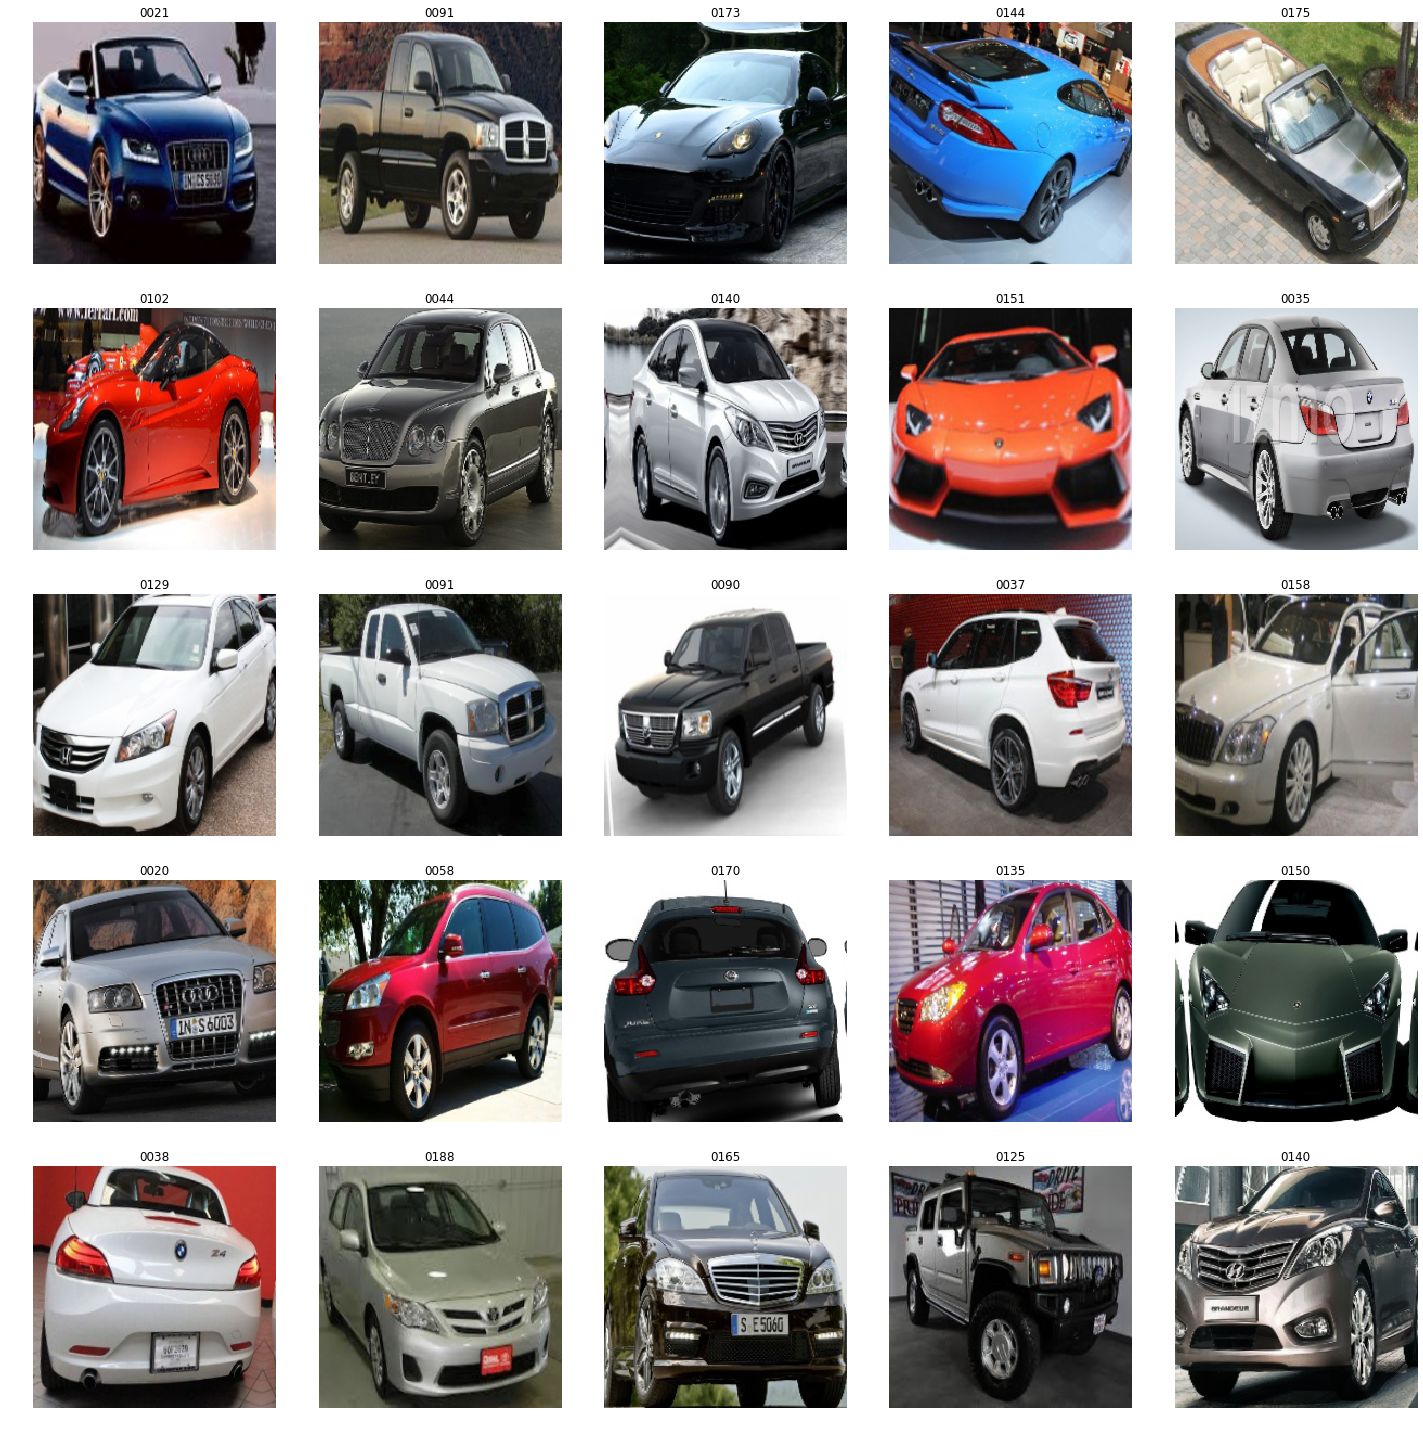

In [0]:
data.show_batch()

In [0]:
# nama kelas dan jumlah kelas
print(data.classes)
len(data.classes),data.c

['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059', '0060', '0061', '0062', '0063', '0064', '0065', '0066', '0067', '0068', '0069', '0070', '0071', '0072', '0073', '0074', '0075', '0076', '0077', '0078', '0079', '0080', '0081', '0082', '0083', '0084', '0085', '0086', '0087', '0088', '0089', '0090', '0091', '0092', '0093', '0094', '0095', '0096', '0097', '0098', '0099', '0100', '0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0110', '0111', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121', '0122', '0123', '0124', '0125',

(196, 196)

In [0]:
#Training menggunakan resnet50
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [0]:
#Training sebanyak 5 epoch
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,4.242798,2.949843,0.369751,01:20
1,2.596827,1.376465,0.674633,01:14
2,1.672609,0.778558,0.814613,01:13
3,1.107570,0.503101,0.890406,01:13
4,0.799139,0.456904,0.904063,01:12


In [0]:
preds,y, loss = learn.get_preds(with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.904062807559967 %.




> Akurasi yang didapatkan menggunakan resnet50 dengan epoch = 5 dan batch size = 32 adalah 90%



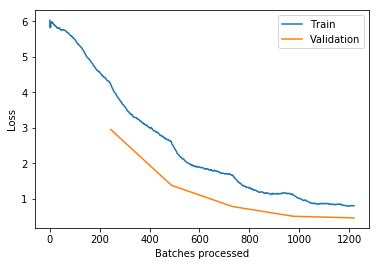

In [0]:
learn.recorder.plot_losses()

In [0]:
#simpan model
learn.save('stanford-cars-1')

In [0]:
#Lakukan interpretasi untuk memperbaiki prediksi
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

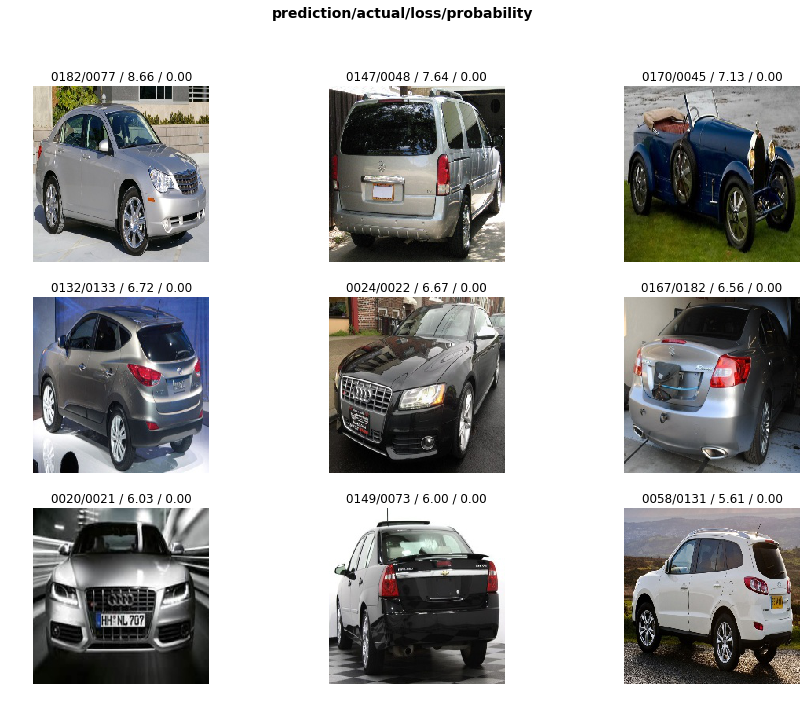

In [0]:
#Berikut adalah 9 gambar dengan kesalahan prediksi
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


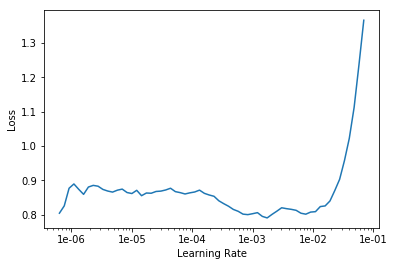

In [0]:
learn.recorder.plot()

In [0]:
#unfreeze model dan lakukan training lagi dengan 20 epoch
learn.unfreeze()
learn.fit_one_cycle(20, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.771901,0.435450,0.909184,01:38
1,0.713442,0.366664,0.924889,01:37
2,0.624448,0.296591,0.939911,01:37
3,0.545989,0.239911,0.952544,01:37
4,0.440831,0.189507,0.960396,01:36
5,0.349401,0.150120,0.970638,01:36
6,0.278695,0.122545,0.974735,01:36
7,0.205208,0.113596,0.972004,01:36
8,0.190144,0.104351,0.975418,01:36
9,0.151675,0.094843,0.975760,01:36


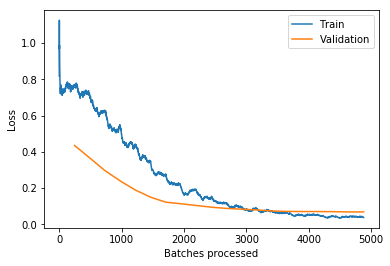

In [0]:
learn.recorder.plot_losses()



> Pada gambar di atas terlihat bahwa terjadi overfitting pada model



In [0]:
preds,y, loss = learn.get_preds(with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.9819051027297974 %.




> Akurasi yang didapatkan setelah menerapkan classification interpretation dengan epoch = 20 dan batch size = 32 adalah 98%



# Kesimpulan



> CNN yang dibangun dengan Keras baik menggunakan Adam optimizer atau SGD optimizer hanya berhasil menghasilkan akurasi sebesar 0.92%. Sedangkan CNN yang dibangun dengan Fastai menggunakan resnet50 berhasil menghasilkan akurasi sebesar 90% dan setelah dilakukan Classification Interpretation, akurasi meningkat hingga mencapai 98%. 

